![](./imagenes/python_logo.jpeg)
# Librería Matplotlib.
***

Los gráficos y las visualizaciones de datos ocupan un lugar central en el *Cálculo Científico* y en la *Ciencia de Datos*; ya sea en los análisis exploratorios, en la *Minería de Datos*, como también en la *Estadística Inferencial* y *Bayesiana*. Gran parte de la estadística moderna tiene que ver con vizualización de datos, por lo que siempre es buena idea que empecemos a ver cómo generar algunos plots sencillos.

TODO: Instalación.

Existen varias librerías para hacer gráficos y visualizaciones de datos en *Python*, [*Matplotlib*]() es una de las más usadas y el estándar en el *Cálculo Científico*. Para importarla en el notebook haremos lo siguiente:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

La primera línea es para decirle a *Jupyter* que los gráficos queden embebidos en la notebook (si no estuvieramos usando la notebook no escribiríamos esta línea).

La segunda línea es la forma estándar de importar `matplotlib`. Notemos que al escribir `as plt` estamos diciendo que accederemos a las funciones contenidas en `matplotlib.pyplot` como `plt`, esto lo hacemos ya que escribir `plt` es más cómodo que escribir `matplotlib.pyplot`.

Veamos cómo hacer un gráfico sencillo:

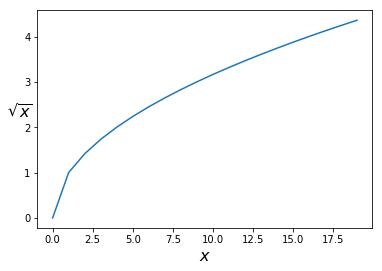

In [21]:
x = range(20)
y = [i ** 0.5 for i in x]
plt.plot(x, y)
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$\sqrt{x}$", fontsize = 16, rotation = False)
plt.show()

* En la primera y segunda línea generamos los datos a ser ploteados.
* En la tercer línea decimos que queremos generar un gráfico del tipo plot (ya veremos que los hay de otros tipos), donde graficaremos _x_ vs. *y*.
* En la cuarta y quinta línea agregamos rótulos a los ejes.
* En la quinta línea usamos la misma notación usada por $\LaTeX$ para escribir fórmulas matemáticas. $\LaTeX$ es un lenguaje para escribir textos que es muy usado en muchas disciplinas científicas para escribir papers, posters, diapositivas, libros, etc.
* Finalmente en la sexta línea damos la instrucción `show` para mostrar el gráfico.

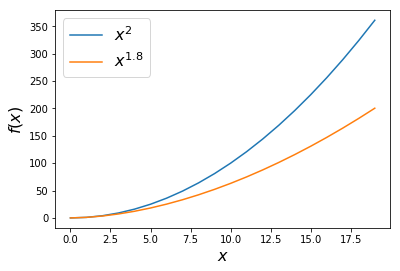

In [22]:
x = range(20)
y = [i ** 2 for i in x]
z = [i ** 1.8 for i in x]
plt.plot(x, y, label = "$x^2$")
plt.plot(x, z, label = "$x^{1.8}$")
plt.xlabel("$x$", fontsize = 16)
plt.ylabel("$f(x)$", fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Existen muchos tipos de gráficos para representar datos. A continuación veremos cinco representaciones comunes de datos unidimensionales:

* Histogramas.
* Kernel Density Plots.
* Stripplot.
* Box Plots.
* Violin Plots.

### Histogramas.

En un [histograma](https://es.wikipedia.org/wiki/Histograma) se representa la *frecuencia* con la que aparecen los distintos valores en un conjunto de datos. Se utilizan barras contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en `bins` (contenedores), y suelen graficarse sin *normalizar* o *normalizados*. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos, mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de `bins` que se usan. Si usamos unos pocos `bins` no lograremos capturar la estructura de los datos, si usamos demasiados `bins` no solo estaremos representando la estructura de los datos, sino también el ruido de los mismos. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

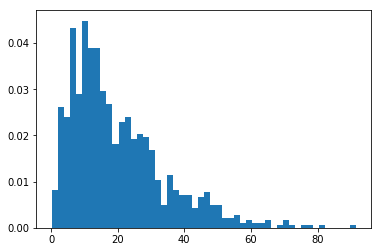

In [27]:
import numpy as np
x = np.random.gamma(2, 10, size = 1000)

plt.hist(x, bins = 50, density = True, cumulative = False)
plt.show()

Aprovechando lo que hemos aprendido, vamos a generar un gráfico que muestre la diferencia entre la *media* y *mediana*:

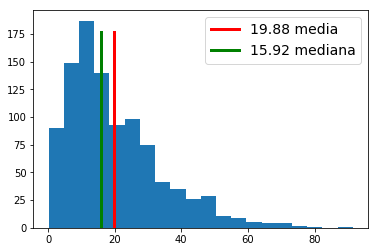

In [29]:
plt.hist(x, bins=20)
media   = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='r', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='g', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14)
plt.show()

### Kernel Density Plot.

Este tipo de gŕafico es una forma suavizada de un histograma de frecuencias. Un gráfico *KDE* se dibuja de la siguiente forma: se reemplaza cada dato por una distribución *Gaussiana* y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana, es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el del *kernel*. Cualquier función simétrica cuya *integral* sea 1 puede ser usada como kernel. La Gaussiana es una de los kernels más usados.

De forma análoga a lo que sucede con los *bins*, los KDE son sensibles a un parámetro llamado `bandwith`. Existen varias *heurísticas* (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el `bandwith` de forma automática de acuerdo a los datos.

Es posible usar *matplotlib* para graficar un *kde*, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada *Seaborn*, la cual no es más que una colección de funciones escritas usando *matplotlib*. Si prestan atención a la primera línea de la siguiente celda verán que importamos `seaborn` de la siguiente forma:

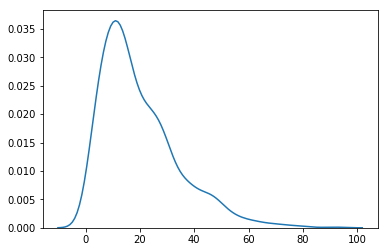

In [32]:
import seaborn as sns
sns.kdeplot(x)
plt.show()

Como *Seaborn* está escrito usando *Matplotlib*, podemos modificar los gráficos realizados con *Seaborn* usando *Matplotlib*. Un sencillo ejemplo que muestra que esto es posible es el siguiente:

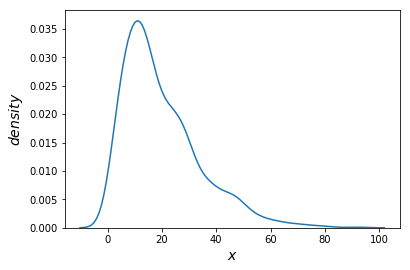

In [37]:
sns.kdeplot(x)
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$density$', fontsize = 14)
plt.show()

### Stripplot.

Este tipo de gráficos sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función `strippplot` de *Seaborn* (un gráfico similar es el *swarmplot*). Los *stripplot* se suelen graficar agregado un poco de *ruido/fluctuaciones* (*jitter* en inglés) en lo largo del eje de las $x$; esto es simplemente un truco para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma linea ya que las variables categóricas no tienen dispersión.

Puede ser útil en sí mismo o puede ser usado superpuesto sobre un *boxplot* o *violinplot*.

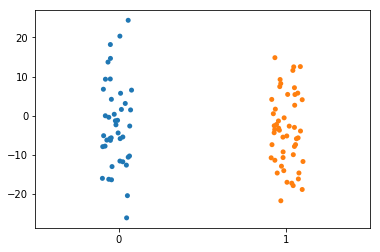

In [39]:
y0 = np.random.normal(0, 10, size = 42)
y1 = np.random.normal(-1, 10, size = 50)
sns.stripplot(data = [y0, y1], jitter = True)
plt.show()

### Box Plots (Wisker-plot o Gráficos de cajas o de bigotes).

Los [gráficos de caja](https://es.wikipedia.org/wiki/Diagrama_de_caja) son una forma de graficar distribuciones basadas en cuartiles. Al igual que el *stripplot*, este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultáneo. La *caja* está delimitada por el primer y tercer *cuartil*, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los *bigotes* pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un *boxplot*, a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango *intercuartil* y los valores por fuera de los bigotes se suelen considerar como *datos aberrantes* (ver más adelante).

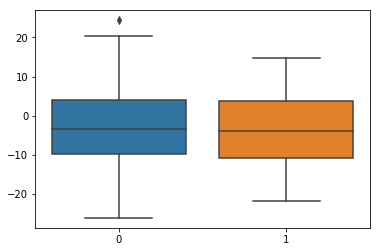

In [41]:
sns.boxplot(data = [y0, y1])
plt.show()

### Violin Plots (Gráficos de violín).

Los [gráficos de violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde:

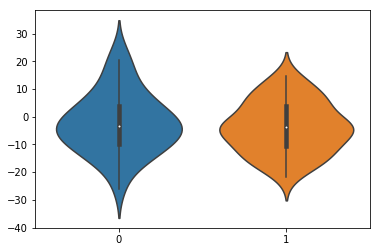

In [43]:
sns.violinplot(data = [y0, y1])
plt.show()

## Datos Aberrantes (*outliers*).

Los *datos aberrantes* (*outliers*) son valores que están muy alejados de la mayoría de los valores de una distribución. Los *datos aberrantes* pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. **Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cuál fue el criterio usado para removerlo**. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato aberrante fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento.